# Cotton leaf Disease Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from  tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, Huber
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping,ReduceLROnPlateau

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import os
import random
import shutil
import zipfile




## unzip the file and store it as cotton-disease-dataset

In [2]:
def extract_zip(path, folder_name):
    zip_f = zipfile.ZipFile(path)
    zip_f.extractall(folder_name)

# extract_zip('archive.zip','cotton-disease-dataset')


def read_dir(path):
    for dirpath , dirnames, filename in os.walk(path):
        print(f"{dirpath} : has {len(dirnames)} folder(s)  and {len(filename)} images init \n")

read_dir('cotton-disease-dataset')


cotton-disease-dataset : has 1 folder(s)  and 0 images init 

cotton-disease-dataset\Cotton Disease : has 3 folder(s)  and 0 images init 

cotton-disease-dataset\Cotton Disease\test : has 3 folder(s)  and 0 images init 

cotton-disease-dataset\Cotton Disease\test\leaf : has 2 folder(s)  and 0 images init 

cotton-disease-dataset\Cotton Disease\test\leaf\diseased cotton leaf : has 0 folder(s)  and 25 images init 

cotton-disease-dataset\Cotton Disease\test\leaf\fresh cotton leaf : has 0 folder(s)  and 26 images init 

cotton-disease-dataset\Cotton Disease\test\plant : has 2 folder(s)  and 0 images init 

cotton-disease-dataset\Cotton Disease\test\plant\diseased cotton plant : has 0 folder(s)  and 28 images init 

cotton-disease-dataset\Cotton Disease\test\plant\fresh cotton plant : has 0 folder(s)  and 27 images init 

cotton-disease-dataset\Cotton Disease\test\pred_class : has 0 folder(s)  and 51 images init 

cotton-disease-dataset\Cotton Disease\train : has 2 folder(s)  and 0 images 

## Data arangement 
1. As it can be seen, the dataset has test, train, val folder and each of them have ''diseased cotton leaf/', 'fresh cotton leaf/', 'diseased cotton plant/', 'fresh cotton plant/''
2. So I seperated those subfolders in leaf and plant folder because I only want to use data that is related to leaf 

In [6]:
main_path = 'cotton-disease-dataset/Cotton Disease/'
def arrange_data():
    dir = ['leaf', 'plant']
    data_class = ['test/', 'train/', 'val/']

    for i in dir:
        for j in data_class:
            os.makedirs('cotton-disease-dataset/Cotton Disease/' + j + i, exist_ok=True)


    sub_dir = ['diseased cotton leaf/', 'fresh cotton leaf/', 'diseased cotton plant/', 'fresh cotton plant/']



    for sub in sub_dir:
        if sub.endswith(' leaf/'):
            shutil.move(src=(main_path + data_class[0] + sub), dst=(main_path + data_class[0] + dir[0] + '/'))
            shutil.move(src=(main_path + data_class[1] + sub), dst=(main_path + data_class[1] + dir[0] + '/'))
            shutil.move(src=(main_path + data_class[2] + sub), dst=(main_path + data_class[2] + dir[0] + '/'))

        elif sub.endswith(' plant/'):
            shutil.move(src=(main_path + data_class[0] + sub), dst=(main_path + data_class[0] + dir[1] + '/'))
            shutil.move(src=(main_path + data_class[1] + sub), dst=(main_path + data_class[1] + dir[1] + '/'))
            shutil.move(src=(main_path + data_class[2] + sub), dst=(main_path + data_class[2] + dir[1] + '/'))
        else:
            print('cant move')

    return f"data has been arranged"

# arrange_data()


## Generating a sample image

image shape :(3472, 3472, 3)


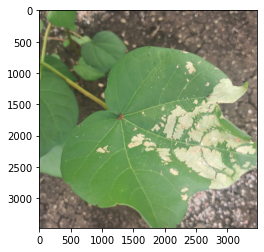

array([[[ 87,  85,  72],
        [ 81,  79,  66],
        [ 82,  80,  67],
        ...,
        [121, 101,  90],
        [116,  96,  85],
        [109,  89,  78]],

       [[ 88,  86,  73],
        [ 78,  76,  63],
        [ 74,  72,  59],
        ...,
        [110,  90,  79],
        [118,  98,  87],
        [129, 109,  98]],

       [[ 94,  92,  79],
        [ 81,  79,  66],
        [ 71,  69,  56],
        ...,
        [131, 111, 100],
        [127, 107,  96],
        [126, 106,  95]],

       ...,

       [[ 97,  90,  74],
        [100,  93,  77],
        [ 97,  90,  74],
        ...,
        [121, 106, 103],
        [117, 102,  99],
        [122, 107, 104]],

       [[ 94,  86,  73],
        [108, 100,  87],
        [109, 101,  88],
        ...,
        [124, 109, 106],
        [119, 104, 101],
        [115, 100,  97]],

       [[ 99,  91,  78],
        [113, 105,  92],
        [105,  97,  84],
        ...,
        [127, 112, 109],
        [124, 109, 106],
        [107,  92,  89]]

In [3]:
main_path = 'cotton-disease-dataset/Cotton Disease/'
def view_data(data_class, data_folder, sub_data_folder):
    target_folder = main_path + data_class + data_folder + sub_data_folder
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + random_image[0])
    plt.imshow(img)
    print(f'image shape :{img.shape}')
    plt.show()
    return img

view_data('test/','leaf/', 'diseased cotton leaf/')

## Data augmentation process

In [4]:
def data_generator():

    train_dir = main_path + 'train/' + 'leaf/'
    test_dir  = main_path + 'test/' + 'leaf/'
    val_dir = main_path + 'val/' + 'leaf/'

    train_gen = ImageDataGenerator(rescale= 1./255.,
                                   rotation_range=25,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True,
                                   fill_mode='nearest',
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

    train_data = train_gen.flow_from_directory(train_dir ,target_size= (224, 224),
                                               batch_size= 32,
                                               class_mode= 'binary',
                                               )

    test_gen = ImageDataGenerator(rescale = 1./255.)
    test_data = test_gen.flow_from_directory(test_dir, target_size= (224, 224),
                                             batch_size= 32,
                                             class_mode= 'binary')

    val_gen = ImageDataGenerator(rescale= 1. / 255.)
    val_data = val_gen.flow_from_directory(val_dir, target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

    return [train_data, test_data, val_data]

train_data, test_data, val_data = data_generator()

Found 715 images belonging to 2 classes.
Found 51 images belonging to 2 classes.
Found 109 images belonging to 2 classes.


## Finding optimal learning curve
1. use the LearningRateScheduler callback function for finding the optimal learning curve

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 74, 74, 64)        296       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)       

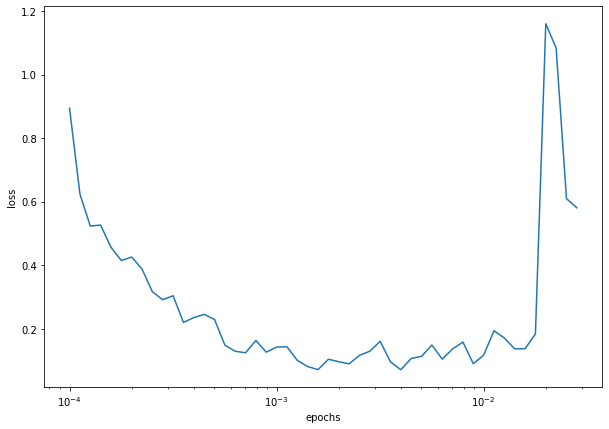

In [10]:
def optimal_learning_curve(train_data, val_data):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding = 'same',
                       input_shape= (224,224,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(1))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))


    model.add(Conv2D(64, (3,3), padding = 'same',
                     activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(1))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same',
                     activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(1))
    model.add(MaxPooling2D(pool_size=(2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(1))
    model.add(MaxPooling2D(pool_size=(2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(1024, 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(1, 'sigmoid'))

    model.summary()

    model.compile(loss=BinaryCrossentropy(),
                  optimizer=Adam(),
                  metrics=['accuracy'])

    scheduler = LearningRateScheduler(lambda epoch: 1e-4 *10 **(epoch/20))
    history = model.fit(train_data, batch_size=32, epochs=50,
                        validation_data=val_data, callbacks=[scheduler])

    lrs = 1e-4 * (10 ** (tf.range(50) / 20))
    plt.figure(figsize=(10, 7))
    plt.semilogx(lrs, history.history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.show()

optimal_learning_curve(train_data, val_data)

## It seems like the model is actually able learn properly between lr = 0.01 to 0.001 or a bit over 0.001
1. setting lr = 0.001

## Creating custom callfack function for stopping the traininh, when model reaches 99% accuracy

In [11]:
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy') > 0.99):
            print("99% accuracy has been reached")
            self.model.stop_training = True
callback = CustomCallbacks()


## Model generation
1. EarlyStopping and ReduceLROnPlateau and be used as a callback function for better resutls but since I have created custom callback for monitoring the accuracy I have not used 
other callback functions

In [20]:
def model_generator(train_data, val_data):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding = 'same',
                       input_shape= (224,224,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(1))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))


    model.add(Conv2D(64, (3,3), padding = 'same',
                     activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(1))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same',
                     activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(1))
    model.add(MaxPooling2D(pool_size=(2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(1))
    model.add(MaxPooling2D(pool_size=(2)))
    model.add(Dropout(0.25))

    # model.add(Conv2D(128, (3, 3), padding='same',
    #                  activation='relu'))
    # model.add(tf.keras.layers.BatchNormalization(1))
    # model.add(MaxPooling2D(pool_size=(3, 3)))
    
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024, 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(1, 'sigmoid'))

    model.summary()

    model.compile(loss = BinaryCrossentropy(),
                  optimizer = Adam(lr = 0.001),
                  metrics= ['accuracy'])

    
    # reduceLRO = ReduceLROnPlateau(monitor = 'val_loss', factor= 0.2,
    #                               patience = 10, verbose=1, mode = 'auto',
    #                               min_delta=0.001, cooldown=5, min_lr=0.01
    #                               )

    # early_stop = EarlyStopping(monitor='val_loss', mode='min',
    #                            patience=5)

    # callbacks = [early_stop]

    history = model.fit(train_data, batch_size= 32, epochs=50,
                       validation_data=val_data)

    return [model, history]

model, history = model_generator(train_data, val_data)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 74, 74, 64)        296       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)       

In [ ]:
model.save('cotton_cnn.h5')
# tf.keras.models.load_model('cotton_cnn.h5')

In [14]:
!pip install sklearn


  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)


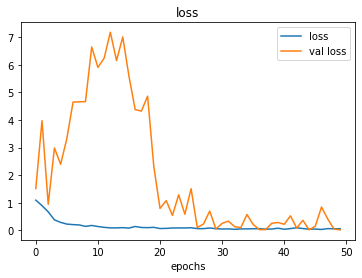

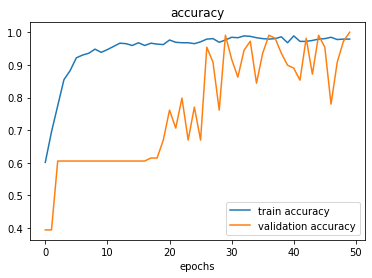

In [21]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_loss_acc(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label = 'loss')
    plt.plot(epochs, val_loss, label = 'val loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend();
    plt.show()

    plt.figure()
    plt.plot(epochs, acc, label = 'train accuracy')
    plt.plot(epochs, val_acc, label = 'validation accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend();
    plt.show()


plot_loss_acc(history)



In [22]:

model_eval = model.evaluate(test_data)
print(model_eval)

2/2 [==============================] - 1s 409ms/step - loss: 0.0089 - accuracy: 1.0000
[0.008946114219725132, 1.0]


tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


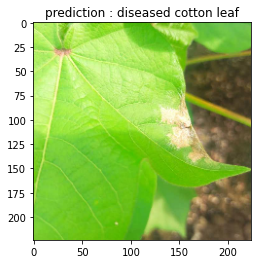

In [23]:

data_path = main_path + 'test/' + 'pred_class/' 
def resize_image(shape):

    random_select = random.sample(os.listdir(data_path), 1)
    image = tf.io.read_file(data_path + '/' + random_select[0])
    image = tf.image.decode_image(image)
    image = tf.image.resize(image, size = [shape, shape])

    image = image / 255.
    return image

test_image = resize_image(224)


import pathlib
data_dir = pathlib.Path(main_path + 'test/' + 'leaf/')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names



def predict_image(model ,class_name):

    test_image = resize_image(224)
    predict = model.predict(tf.expand_dims(test_image, axis=0))
    print(tf.round(predict))
    predict_class = class_name[int(tf.round(predict))]
    
    plt.imshow(test_image)
    plt.title(f'prediction : {predict_class}')
    

    plt.show()

predict_image(model, class_names)

tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


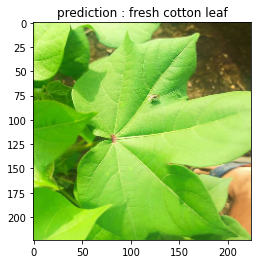

In [25]:
predict_image(model, class_names)